In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.9.1'

In [4]:
#Checking if i have GPU 
tf.config.list_physical_devices('GPU')

[]

# Data Arugumentation

In [5]:
#Data Argumentation Meaning creating more data from existing Data
#Two important featurs in image preprocessing is 1: Resizing 2: ReScaling

In [6]:
traning_datagenerator=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,
                                        shear_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,
                                         validation_split=0.1)

In [7]:
train=traning_datagenerator.flow_from_directory('E:\DataScience\FireSmokeDetection\Traning',target_size=(256,256),
                                                color_mode='rgb',class_mode='binary',batch_size=16,subset='training')

validation=traning_datagenerator.flow_from_directory('E:\DataScience\FireSmokeDetection\Traning',target_size=(256,256),
                                                color_mode='rgb',class_mode='binary',batch_size=16,subset='validation')

#From both fire and smoke(belonging to 2 classes) 90 % of data is in traning Data 
#Remaing 10 % Data is for validation

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


# CNN Architecture

In [8]:
from tensorflow.keras.models import Sequential
cnn=Sequential()

In [9]:
#First Block of CNN Conv2D---> Extracting important featur from Image
#Convolution 2D is our first step of feature extraction with relu activation

In [10]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Softmax
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
#activation function= If we have quality data than that data will pass to next neuron and we have threshold value 
#If the Value is above threshold valu than It will pass to next neuron
#If 1 activate the neuron
#If 0 the import featur or the quality data will not move further

#First Layer
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[256,256,3],padding='same'))
cnn.add(MaxPool2D(pool_size=2))

#Second Layer
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=2))

#Third Layer
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPool2D(pool_size=2))

In [12]:
#Flatting
cnn.add(Flatten())
#Fully Connected Layer
cnn.add(Dense(units=128,activation='relu'))
#Output Layer
#Sigmoid activation function works on threshold value 50%
cnn.add(Dense(units=1,activation='sigmoid'))

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [14]:
checkpoint=ModelCheckpoint('E:\DataScience\FireSmokeDetection\models\smoke-fire.h5',
                          monitor='val_loss',save_best_only=True,mode='min')
callbacks=[checkpoint]

#Compile our Model

In [15]:
batch_size=16
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.fit_generator(train,validation_data=validation,steps_per_epoch=train.samples//batch_size,
                  epochs=10,validation_steps=validation.samples//batch_size,
                 callbacks=callbacks)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6016\64203252.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,steps_per_epoch=train.samples//batch_size,


Epoch 1/10
772/772 [==============================] - 1555s 2s/step - loss: 0.0676 - accuracy: 0.9809 - val_loss: 0.0127 - val_accuracy: 0.9926
Epoch 2/10
772/772 [==============================] - 1793s 2s/step - loss: 0.0501 - accuracy: 0.9887 - val_loss: 0.0197 - val_accuracy: 0.9926
Epoch 3/10
772/772 [==============================] - 1794s 2s/step - loss: 0.0229 - accuracy: 0.9916 - val_loss: 0.0202 - val_accuracy: 0.9912
Epoch 4/10
772/772 [==============================] - 20507s 27s/step - loss: 0.0406 - accuracy: 0.9893 - val_loss: 0.0068 - val_accuracy: 0.9971
Epoch 5/10
772/772 [==============================] - 1861s 2s/step - loss: 0.0210 - accuracy: 0.9927 - val_loss: 0.0115 - val_accuracy: 0.9963
Epoch 6/10
772/772 [==============================] - 2000s 3s/step - loss: 0.0294 - accuracy: 0.9921 - val_loss: 0.0151 - val_accuracy: 0.9919
Epoch 7/10
772/772 [==============================] - 1914s 2s/step - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0116 - val_accurac

#Lets test it

In [42]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
cnn=load_model('E:\DataScience\FireSmokeDetection\models\smoke-fire.h5')
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import PIL

In [44]:
image_for_testing=r'E:\DataScience\FireSmokeDetection\Traning\fire\e.JPG'
test_image=image.load_img(image_for_testing,target_size=(256,256))

In [45]:
test_image=image.img_to_array(test_image)#Convert image to array
test_image=test_image/255 #Rescaling og Image
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
if result[0][0]==0:
    print("It is Fire")
else:
    print("It is Smoke")

1/1 [==============================] - 0s 204ms/step
It is Smoke


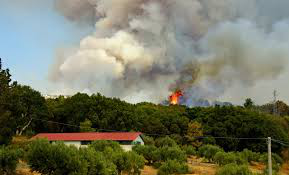

In [46]:
PIL.Image.open(image_for_testing)